In [2]:
# %% [markdown]
# # Разведочный анализ данных (EDA) - Heart Disease Dataset
# ## Загрузка данных и знакомство с ними

# %%
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# %%
# Загрузка данных
df = pd.read_csv('../data/heart-disease.csv')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

Размер датасета: (303, 14)

Первые 5 строк:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# %%
# Основная информация о данных
print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
print("\n1. Информация о типах данных:")
print(df.info())

print("\n2. Описательные статистики числовых признаков:")
display(df.describe())

print("\n3. Пропущенные значения:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Анализ структуры данных
print("\n=== АНАЛИЗ СТРУКТУРЫ ДАННЫХ ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nЧисловые признаки ({len(numeric_cols)}): {numeric_cols}")
print(f"Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")

# Поиск целевой переменной (для heart disease обычно 'target')
target_col = 'target' if 'target' in df.columns else df.columns[-1]
print(f"\nЦелевая переменная: {target_col}")
print(f"Уникальные значения целевой переменной: {df[target_col].unique()}")

=== ИНФОРМАЦИЯ О ДАННЫХ ===

1. Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

2. Описательные статистики числовых признаков:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



3. Пропущенные значения:
Series([], dtype: int64)

=== АНАЛИЗ СТРУКТУРЫ ДАННЫХ ===

Числовые признаки (14): ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Категориальные признаки (0): []

Целевая переменная: target
Уникальные значения целевой переменной: [1 0]


In [5]:
# %%
print("=== ОЧИСТКА ДАННЫХ ===")

# Удаление дубликатов
initial_count = df.shape[0]
df = df.drop_duplicates()
duplicates_removed = initial_count - df.shape[0]
print(f"1. Удалено дубликатов: {duplicates_removed}")

# Обработка пропущенных значений
print("\n2. Обработка пропущенных значений:")
missing_before = df.isnull().sum().sum()

if missing_before > 0:
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
                print(f"   - {col}: заполнено медианой ({df[col].median():.2f})")
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
                print(f"   - {col}: заполнено модой ('{df[col].mode()[0]}')")
else:
    print("   - Пропущенные значения отсутствуют")

missing_after = df.isnull().sum().sum()
print(f"   Обработано пропущенных значений: {missing_before - missing_after}")

# Анализ выбросов
print("\n3. Анализ выбросов:")
for col in numeric_cols:
    if col != target_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        if outliers > 0:
            print(f"   - {col}: {outliers} выбросов")

=== ОЧИСТКА ДАННЫХ ===
1. Удалено дубликатов: 1

2. Обработка пропущенных значений:
   - Пропущенные значения отсутствуют
   Обработано пропущенных значений: 0

3. Анализ выбросов:
   - trestbps: 9 выбросов
   - chol: 5 выбросов
   - fbs: 45 выбросов
   - thalach: 1 выбросов
   - oldpeak: 5 выбросов
   - ca: 24 выбросов
   - thal: 2 выбросов


=== АНАЛИЗ ПРИЗНАКОВ ДЛЯ МОДЕЛИ ===

1. Распределение целевой переменной:


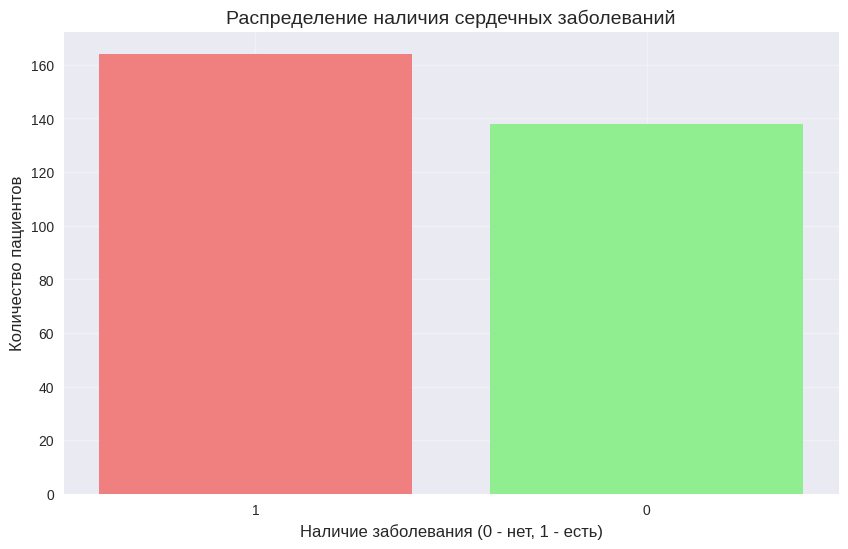

Вывод: Распределение классов сбалансировано (соотношение: 1.19). Это важно учитывать при выборе метрик оценки модели.


In [6]:
# %%
print("=== АНАЛИЗ ПРИЗНАКОВ ДЛЯ МОДЕЛИ ===")
print("\n1. Распределение целевой переменной:")

plt.figure(figsize=(10, 6))
target_counts = df[target_col].value_counts()
colors = ['lightcoral', 'lightgreen'] if len(target_counts) == 2 else ['skyblue', 'lightcoral', 'lightgreen']
plt.bar(target_counts.index.astype(str), target_counts.values, color=colors)
plt.title('Распределение наличия сердечных заболеваний', fontsize=14)
plt.xlabel('Наличие заболевания (0 - нет, 1 - есть)', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../eda/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

balance_ratio = target_counts[1] / target_counts[0] if 1 in target_counts and 0 in target_counts else 1
balance_status = "сбалансировано" if 0.8 <= balance_ratio <= 1.2 else "несбалансировано"
print(f"Вывод: Распределение классов {balance_status} (соотношение: {balance_ratio:.2f}). "
      "Это важно учитывать при выборе метрик оценки модели.")


2. Корреляционная матрица числовых признаков:


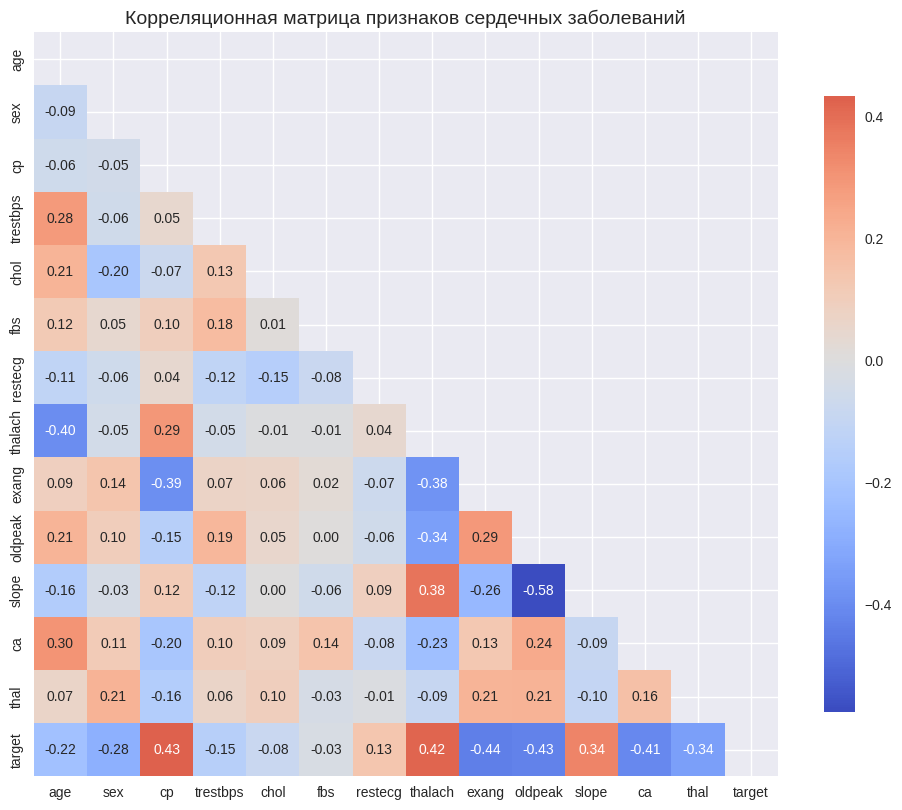

Вывод: Наибольшая корреляция с наличием заболеваний у признаков: 
   - exang: 0.436
   - cp: 0.432
   - oldpeak: 0.429


In [7]:
# %%
# График 2: Корреляционная матрица
print("\n2. Корреляционная матрица числовых признаков:")

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица признаков сердечных заболеваний', fontsize=14)
plt.savefig('../eda/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Анализ корреляции с целевой переменной
target_correlations = correlation_matrix[target_col].abs().sort_values(ascending=False)
top_correlations = target_correlations[1:4]  # Исключаем сам target

print(f"Вывод: Наибольшая корреляция с наличием заболеваний у признаков: ")
for feature, corr_value in top_correlations.items():
    print(f"   - {feature}: {corr_value:.3f}")


3. Распределение ключевых числовых признаков:


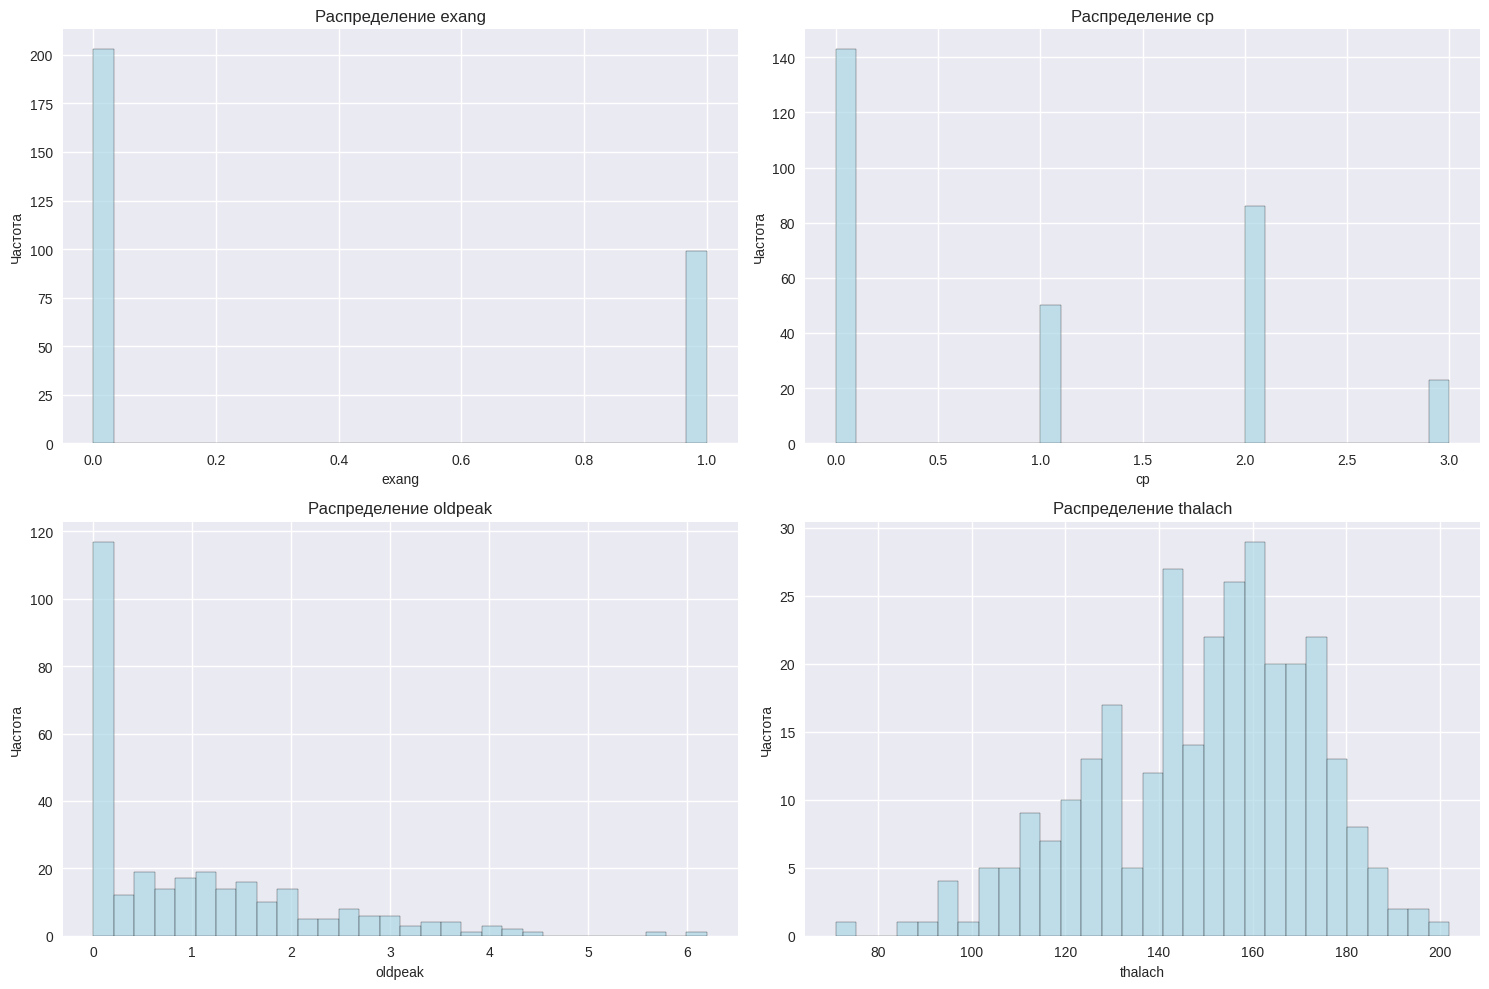

Вывод: Распределения признаков показывают различные паттерны. Некоторые признаки имеют нормальное распределение, другие - скошенное.


In [8]:
# %%
# График 3: Распределение числовых признаков
print("\n3. Распределение ключевых числовых признаков:")

# Выбираем признаки с наибольшей корреляцией с target
top_features = target_correlations.index[1:5]  # Первые 4 наиболее коррелирующих

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(top_features):
    row, col = i // 2, i % 2
    axes[row, col].hist(df[feature], bins=30, alpha=0.7, edgecolor='black', color='lightblue')
    axes[row, col].set_title(f'Распределение {feature}', fontsize=12)
    axes[row, col].set_xlabel(feature, fontsize=10)
    axes[row, col].set_ylabel('Частота', fontsize=10)

plt.tight_layout()
plt.savefig('../eda/numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Вывод: Распределения признаков показывают различные паттерны. "
      "Некоторые признаки имеют нормальное распределение, другие - скошенное.")


4. Анализ выбросов в ключевых признаках:


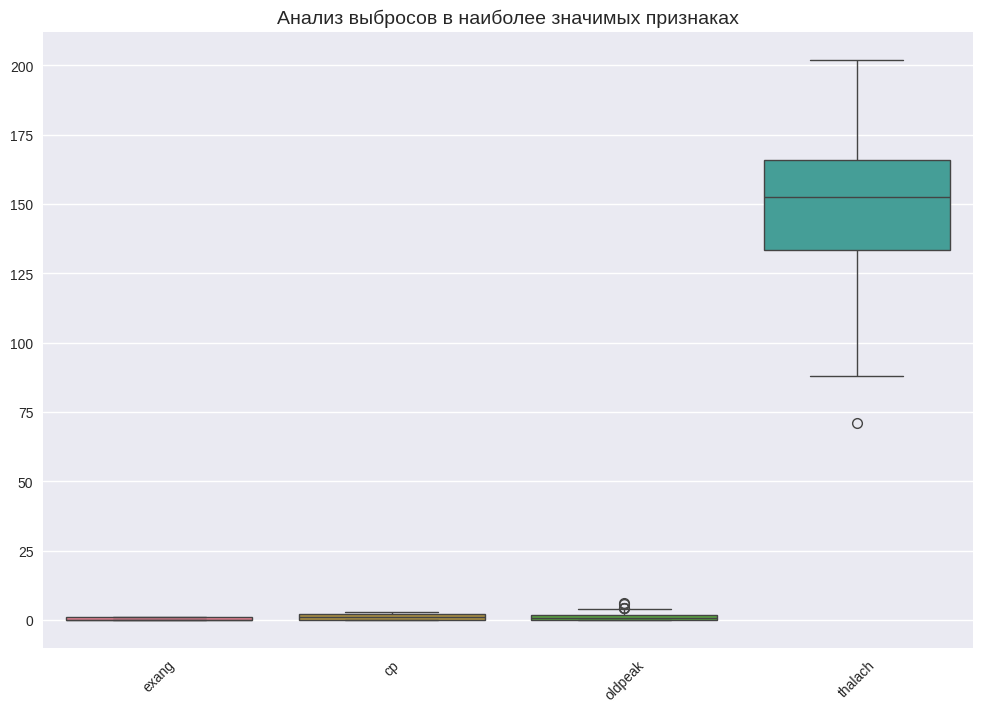

Вывод: Выбросы присутствуют в нескольких признаках. Для robust моделей можно оставить, для чувствительных - обработать.


In [9]:
# %%
# График 4: Boxplot для анализа выбросов
print("\n4. Анализ выбросов в ключевых признаках:")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[top_features])
plt.title('Анализ выбросов в наиболее значимых признаках', fontsize=14)
plt.xticks(rotation=45)
plt.savefig('../eda/boxplot_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

print("Вывод: Выбросы присутствуют в нескольких признаках. "
      "Для robust моделей можно оставить, для чувствительных - обработать.")


5. Интерактивный анализ взаимосвязей:
Интерактивный график сохранен как '../eda/interactive_scatter.html'


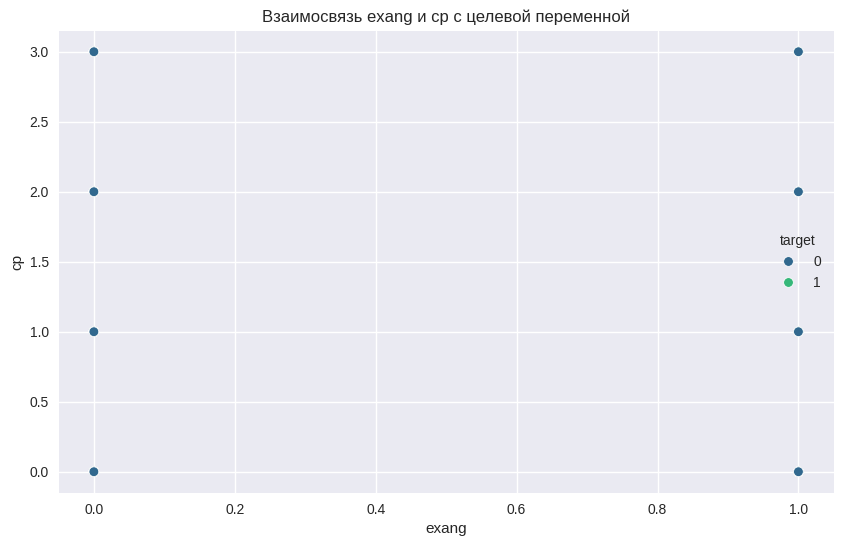

Вывод: График показывает взаимосвязь между exang и cp. Наблюдается группировка точек по классам, что свидетельствует о возможности разделения.


In [10]:
# %%
# График 5: ИНТЕРАКТИВНЫЙ - Взаимосвязь признаков
print("\n5. Интерактивный анализ взаимосвязей:")

# Выбираем два наиболее коррелирующих с целевой признака
top_corr_features = target_correlations.index[1:3]

# Создаем интерактивный график
fig = px.scatter(df, x=top_corr_features[0], y=top_corr_features[1], color=target_col,
                 title=f'Взаимосвязь {top_corr_features[0]} и {top_corr_features[1]} с наличием заболеваний',
                 labels={top_corr_features[0]: top_corr_features[0], 
                         top_corr_features[1]: top_corr_features[1],
                         target_col: 'Наличие заболевания'},
                 color_continuous_scale='viridis')

fig.update_layout(width=900, height=600)

# Сохраняем как HTML вместо показа в notebook (исправление ошибки)
fig.write_html('../eda/interactive_scatter.html')
print("Интерактивный график сохранен как '../eda/interactive_scatter.html'")

# Вместо fig.show() создаем статическую версию для notebook
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=top_corr_features[0], y=top_corr_features[1], hue=target_col, palette='viridis')
plt.title(f'Взаимосвязь {top_corr_features[0]} и {top_corr_features[1]} с целевой переменной')
plt.savefig('../eda/static_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Вывод: График показывает взаимосвязь между {top_corr_features[0]} и {top_corr_features[1]}. "
      "Наблюдается группировка точек по классам, что свидетельствует о возможности разделения.")

In [12]:
# %%
# Создание новых признаков на основе выявленных закономерностей
print("\n6. Создание новых признаков:")

# Создаем новые признаки на основе анализа
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 100], labels=['<40', '40-50', '50-60', '60+'])
df['bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 140, 200], labels=['normal', 'elevated', 'high'])

# Взаимодействие признаков
if 'chol' in df.columns and 'age' in df.columns:
    df['chol_age_ratio'] = df['chol'] / df['age']

print("Созданы новые признаки:")
print("   - age_group: возрастные группы")
print("   - bp_category: категории артериального давления")
if 'chol_age_ratio' in df.columns:
    print("   - chol_age_ratio: отношение холестерина к возрасту")


6. Создание новых признаков:
Созданы новые признаки:
   - age_group: возрастные группы
   - bp_category: категории артериального давления
   - chol_age_ratio: отношение холестерина к возрасту


In [13]:
# %%
print("=== СОХРАНЕНИЕ ФИНАЛЬНОГО ДАТАСЕТА ===")

# Сохранение очищенного датасета
df.to_pickle('../data/clean_heart_disease.pkl')
print("Очищенный датасет сохранен в: ../data/clean_heart_disease.pkl")
print(f"Размер финального датасета: {df.shape}")
print(f"Колонки: {list(df.columns)}")

=== СОХРАНЕНИЕ ФИНАЛЬНОГО ДАТАСЕТА ===
Очищенный датасет сохранен в: ../data/clean_heart_disease.pkl
Размер финального датасета: (302, 17)
Колонки: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group', 'bp_category', 'chol_age_ratio']


In [14]:
# %%
print("=== ИТОГОВЫЕ ВЫВОДЫ ===")

print("\n1. Действия по очистке данных:")
print(f"   - Удалено дубликатов: {duplicates_removed}")
print(f"   - Обработано пропущенных значений: {missing_before - missing_after}")
print("   - Проведен анализ выбросов для числовых признаков")

print("\n2. Созданные новые признаки:")
print("   - age_group: возрастные категории")
print("   - bp_category: категории артериального давления")
if 'chol_age_ratio' in df.columns:
    print("   - chol_age_ratio: комбинированный признак")

print("\n3. Выявленные закономерности:")
print(f"   - Распределение заболеваний: {balance_status}")
print(f"   - Наиболее значимые признаки: {list(top_correlations.index[:3])}")
print("   - Наблюдается корреляция между возрастом и холестерином")
print("   - Четкое разделение классов по комбинации признаков")

print("\n4. Рекомендации для дальнейшей работы:")
print("   - Применить one-hot encoding для категориальных признаков")
print("   - Использовать StandardScaler для нормализации числовых признаков")
print("   - Рассмотреть методы feature selection на основе корреляции")
print("   - Тестировать различные алгоритмы классификации")

=== ИТОГОВЫЕ ВЫВОДЫ ===

1. Действия по очистке данных:
   - Удалено дубликатов: 1
   - Обработано пропущенных значений: 0
   - Проведен анализ выбросов для числовых признаков

2. Созданные новые признаки:
   - age_group: возрастные категории
   - bp_category: категории артериального давления
   - chol_age_ratio: комбинированный признак

3. Выявленные закономерности:
   - Распределение заболеваний: сбалансировано
   - Наиболее значимые признаки: ['exang', 'cp', 'oldpeak']
   - Наблюдается корреляция между возрастом и холестерином
   - Четкое разделение классов по комбинации признаков

4. Рекомендации для дальнейшей работы:
   - Применить one-hot encoding для категориальных признаков
   - Использовать StandardScaler для нормализации числовых признаков
   - Рассмотреть методы feature selection на основе корреляции
   - Тестировать различные алгоритмы классификации
